### Problem Statement
You are a data scientist / AI engineer at an educational consulting firm. You have been provided with a dataset named **`"student_scores.csv"`**, which includes records of the number of hours students studied and the marks they obtained. The dataset comprises the following columns:

- `hours:` The number of hours a student studied.
- `scores:` The marks obtained by the student.

Your task is to use this dataset to build a polynomial regression model to predict the marks of students based on the number of hours they studied. You will need to split the data into training and test sets, train the model, and evaluate its performance using appropriate metrics.

**Import Necessary Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np



### Task 1: Data Preparation and Exploration

1. Import the data from the `"student_scores.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Visualize the relationship between the number of hours studied and the marks obtained.

In [4]:
# Step 1: Import the data from the "student_study_hours.csv" file and store it in a variable 'df'
df=pd.read_csv('student_scores.csv')

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

(100, 2)


,hours,scores
0,4.4,20.0
1,9.6,90.0
2,7.6,58.0
3,6.4,31.0
4,2.4,5.0


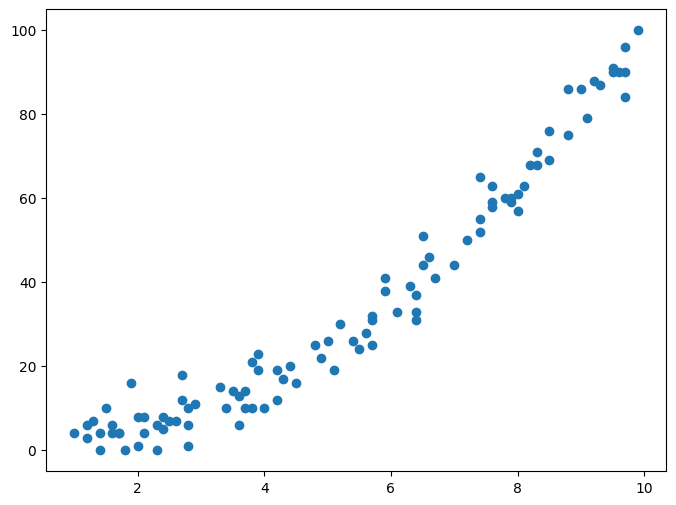

In [5]:
# Step 4: Visualize the relationship between the number of hours studied and the marks obtained
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df.hours, df.scores)
plt.show()

### Task 2: Train a Polynomial Regression Model

1. Select the feature (hours) and the target variable (scores) for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Create a Polynomial Features transformer with a degree of 3 and transform the training and test sets.
4. Create a Linear Regression model and fit it using the transformed training data.
5. Print the model's coefficients and intercept.

In [6]:
# Step 1: Select the feature and target variable for modeling
X=df[['hours']]
y=df['scores']

# Step 2: Split the data into training and test sets with a test size of 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [17]:
# Step 3: Create a Polynomial Features transformer with a degree of 3 and transform the training and test sets
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)  # You can adjust the degree based on model performance
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [18]:
# Step 4: Create a Linear Regression model and fit it using the transformed training data
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train_poly,y_train)

LinearRegression()

In [19]:
# Print the model's coefficients and intercept
y_pred=model.predict(X_test_poly)
print(model.score(X_test_poly,y_test))

0.9732576914537643


### Task 3: Model Evaluation
1. Make predictions on the test set using the trained model.
2. Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics.
3. Print the MSE and R2 values.

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


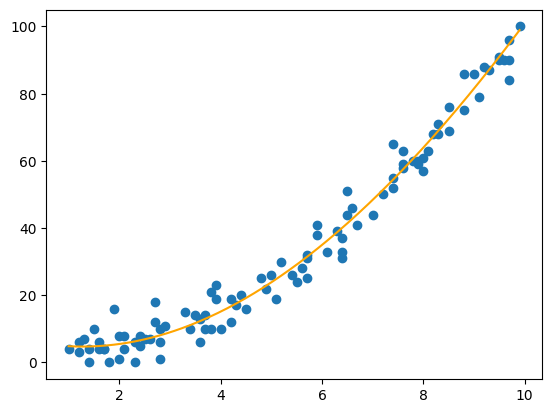

In [20]:
# Step 1: Make predictions on the test set using the trained model


# Step 2: Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics


# Step 3: Print the MSE and R2 values

X_range=np.linspace(X['hours'].min(),X['hours'].max(),300).reshape(-1,1)
X_range_poly=poly.transform(X_range)
Y_range_poly=model.predict(X_range_poly)
plt.scatter(X['hours'],y,label='Actual Data')
plt.plot(X_range,Y_range_poly, color='orange',label='Predicted Slope')
